In [14]:
# Import libraries to be used
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import io
from matplotlib.gridspec import GridSpec

# Input the file name
file_name = input("Please enter the name of the WhatsApp chat export file: ")
with open(file_name, "r", encoding="utf-8") as file:
    conversation = file.readlines()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Please enter the name of the WhatsApp chat export file: hello.txt


<ipython-input-15-689eca385121>:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-15-689eca385121>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"] = data["Message"].apply(lambda msg: sentiments.polarity_scores(msg)["pos"])
<ipython-input-15-689eca385121>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

         Date       Time              Author  \
6  2024-04-03    9:15 am     +91 70115 25217   
7  2024-04-03    9:15 am     +91 70115 25217   
8  2024-05-03    8:58 am     +91 70115 25217   
9  2024-03-17   10:33 pm     +91 70115 25217   
10 2024-03-17   10:35 pm     +91 70115 25217   
11 2024-03-17   10:36 pm               VICKY   
12 2024-03-17   10:40 pm     +91 89301 71150   
13 2024-03-18    1:09 pm   Chirag Verma Ymca   
14 2024-03-18    1:11 pm      Palak Enc Ymca   
15 2024-03-18    1:16 pm      Lakshay Bhatia   
16 2024-03-18    1:18 pm          Rohan Ymca   
17 2024-03-18    1:24 pm              Gautam   
18 2024-03-18    1:26 pm     +91 76784 99118   
19 2024-03-18    1:26 pm              Namita   
20 2024-03-18    1:27 pm  Rohan Kashyap Ymca   
21 2024-03-18    1:27 pm          Karan Ymca   
22 2024-03-18    1:27 pm     Atul Verma Ymca   
23 2024-03-18    1:28 pm     +91 89507 52691   
24 2024-03-18    1:29 pm        Daanish Ymca   
25 2024-03-18    1:33 pm     +91 86849 6

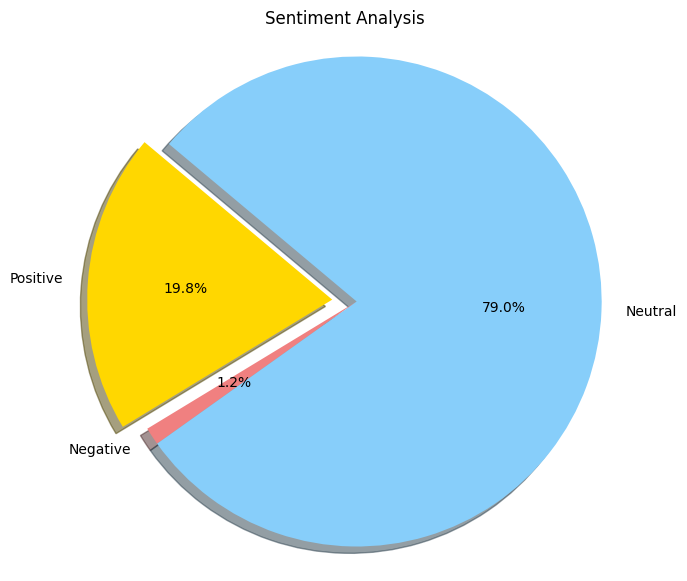

In [15]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)(?:\s?(am|pm|AM|PM))? -'
    result = re.match(pattern,s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s) == 2:
        return True
    else:
        return False

def messages(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(",")
    message = " ".join(splitline[1:])

    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author = None

    return date, time, author, message

data = []
messageBuffer=[]
for line in conversation:
    line = line.strip()
    if date_time(line):
        if len(messageBuffer) > 0:
            data.append([date, time, author, ' '.join(messageBuffer)])
        messageBuffer.clear()
        date, time, author, message = messages(line)
        messageBuffer.append(message)
    else:
        messageBuffer.append(line)

df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

data = df.dropna()

sentiments = SentimentIntensityAnalyzer()

data["Positive"] = data["Message"].apply(lambda msg: sentiments.polarity_scores(msg)["pos"])
data["Negative"] = data["Message"].apply(lambda msg: sentiments.polarity_scores(msg)["neg"])
data["Neutral"] = data["Message"].apply(lambda msg: sentiments.polarity_scores(msg)["neu"])

print(data.head(20))

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def score(a,b,c):
    if(a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")

score(x, y, z)

# Plotting the sentiment analysis results
labels = ['Positive', 'Negative', 'Neutral']
sizes = [x, y, z]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis')
plt.show()

Total number of messages: 87
Total number of users: 39
Total number of words: 377
Total number of media shared: 1

Messages per Author:
Author
+91 70115 25217       14
+91 72060 19193        1
+91 76784 99118        1
+91 78707 16740        3
+91 79821 08619        1
+91 80539 63368        2
+91 86849 64709        4
+91 89301 71150        2
+91 89507 52691        1
+91 90534 14059        1
+91 93505 77602        1
+91 97119 79770        1
+91 99582 36611        3
Aman Budhraja Ymca     1
Amrita Ymca            3
Anuj                   1
Arpit Ymca             1
Atul Verma Ymca        2
Ayush Goel             1
Ayush Mittal Ymca      1
Chirag Verma Ymca      2
Daanish Ymca           1
Gautam                 3
Karam Bhatia           3
Karan Ymca             1
Khushiram YMCA         1
Lakshay Bhatia         2
Namita                 2
Palak Enc Ymca         3
Pooja Ymca             3
Robin Ymca             7
Rohan Kashyap Ymca     2
Rohan Ymca             2
Rounak Jotshi Ymca     2
Sushmit

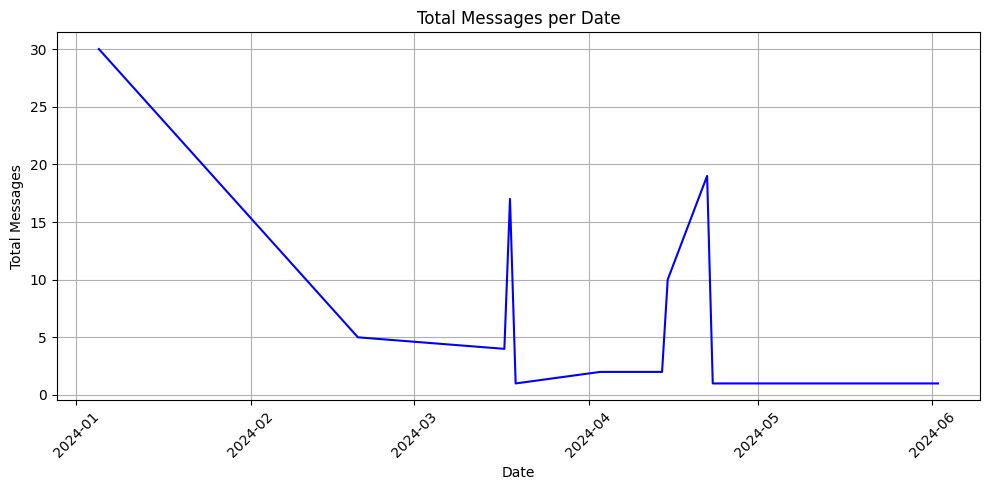


Most common words in the chat:
1           27
mam         23
this        19
yes         17
please      15
message     11
was         11
deleted      9
maam         7
students     6
Name: count, dtype: int64


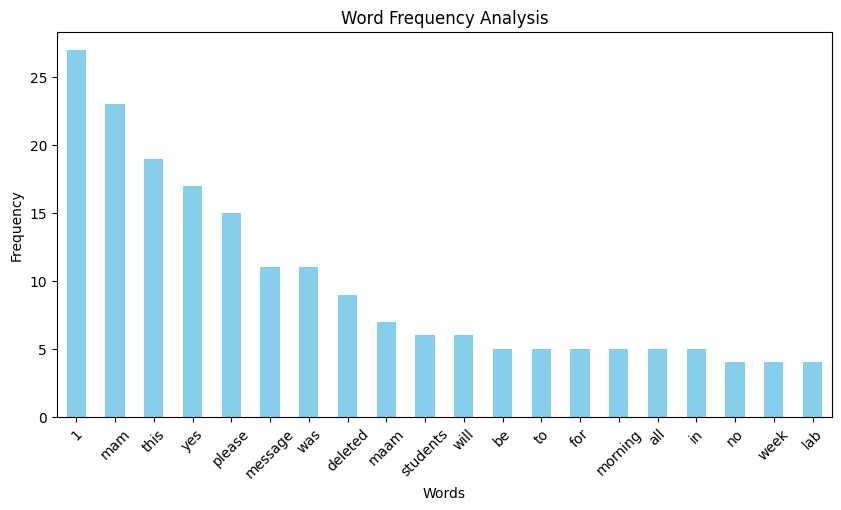

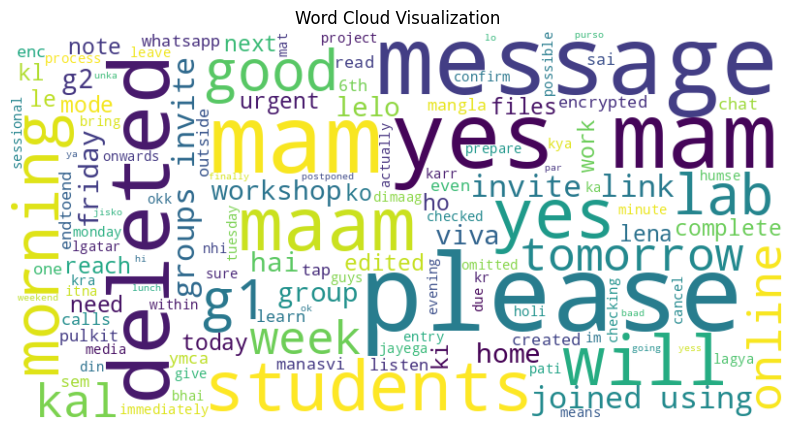

<ipython-input-16-68052ba6216d>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Emojis'] = data['Message'].apply(extract_emojis)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


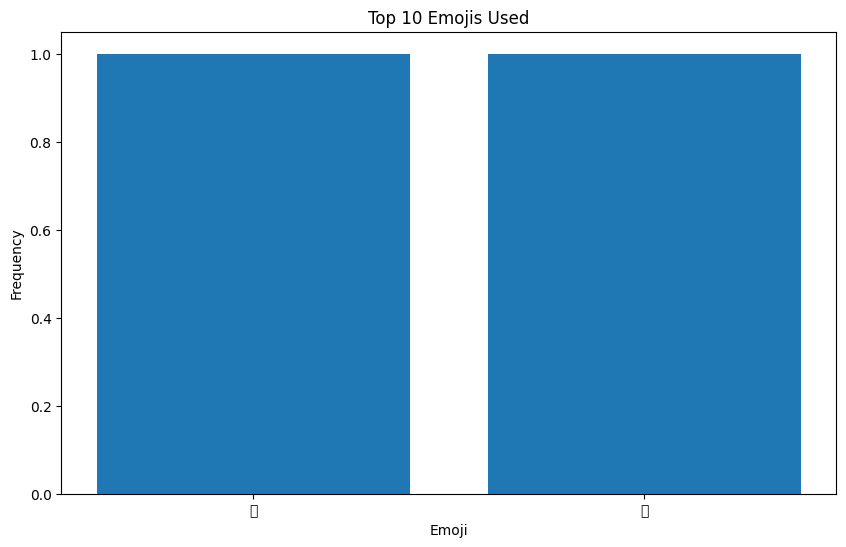

In [16]:
# Total number of messages
total_messages = data.shape[0]

# Total number of users
total_users = data['Author'].nunique()

# Total number of words
total_words = data['Message'].apply(lambda x: len(x.split())).sum()

# Total number of media shared
total_media = data['Message'].apply(lambda x: "<Media omitted>" in x).sum()

print(f"Total number of messages: {total_messages}")
print(f"Total number of users: {total_users}")
print(f"Total number of words: {total_words}")
print(f"Total number of media shared: {total_media}")


# Chat Analysis
# Messages per Author
messages_per_author = df.groupby("Author")["Message"].count()
print("\nMessages per Author:")
print(messages_per_author)

# Average message length per Author
df["MessageLength"] = df["Message"].apply(len)
average_message_length_per_author = df.groupby("Author")["MessageLength"].mean()
print("\nAverage Message Length per Author:")
print(average_message_length_per_author)

# Total messages per date
messages_per_date = df.groupby(df["Date"].dt.date)["Message"].count()
print("\nTotal Messages per Date:")
print(messages_per_date)

# Plotting the total messages per date
plt.figure(figsize=(10, 5))
messages_per_date.plot(kind="line", color="blue")
plt.title("Total Messages per Date")
plt.xlabel("Date")
plt.ylabel("Total Messages")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Word Frequency Analysis
# Convert messages to lowercase
df['Message'] = df['Message'].str.lower()

# Define a function to clean text
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Clean the text
df['Clean_Message'] = df['Message'].apply(clean_text)

# Split each message into words
words = df['Clean_Message'].str.split(expand=True).unstack().value_counts()

# Print the most common 10 words
print("\nMost common words in the chat:")
print(words.head(10))

# Plot word frequency analysis
plt.figure(figsize=(10, 5))
words.head(20).plot(kind='bar', color='skyblue')
plt.title('Word Frequency Analysis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Word Cloud Visualization
# Combine all messages into a single string
text = " ".join(message for message in df['Clean_Message'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud Visualization')
plt.show()

import regex as re
from collections import Counter

# Function to extract emojis from messages
def extract_emojis(text):
    emoji_list = []
    emoji_regex = re.compile(r'\p{So}')
    emojis = emoji_regex.findall(text)
    for emoji in emojis:
        emoji_list.append(emoji)
    return emoji_list

# Extracting emojis from messages
data['Emojis'] = data['Message'].apply(extract_emojis)

# Flattening the list of emojis
emojis_list = [emoji for sublist in data['Emojis'] for emoji in sublist]

# Counting the occurrence of each emoji
emoji_counts = Counter(emojis_list)

# Getting the most common emojis
most_common_emojis = emoji_counts.most_common(10)

# Extracting emoji and frequency for plotting
emojis, frequencies = zip(*most_common_emojis)

# Plotting the most used emojis
plt.figure(figsize=(10, 6))
plt.bar(emojis, frequencies)
plt.title('Top 10 Emojis Used')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


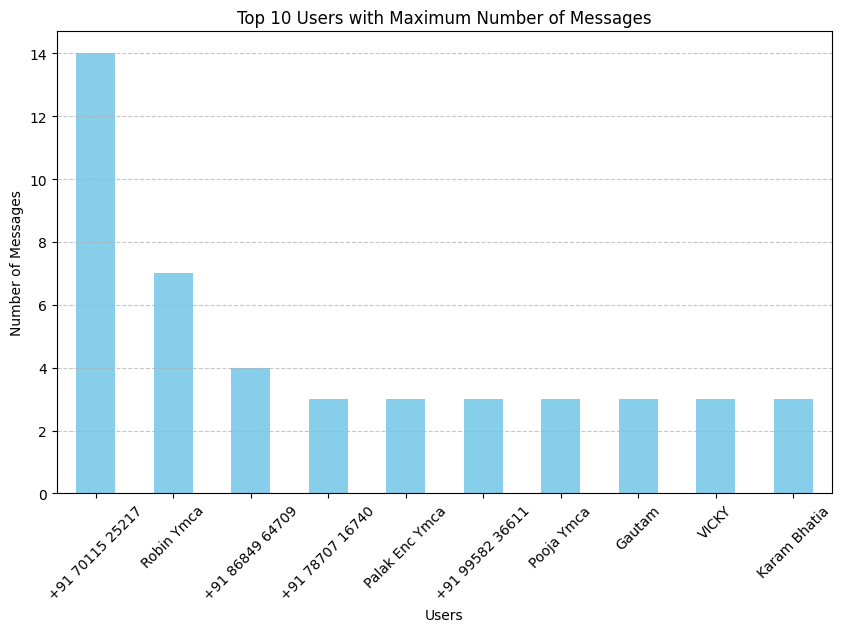





The day with the maximum number of messages was 2024-01-05 with 30 messages.


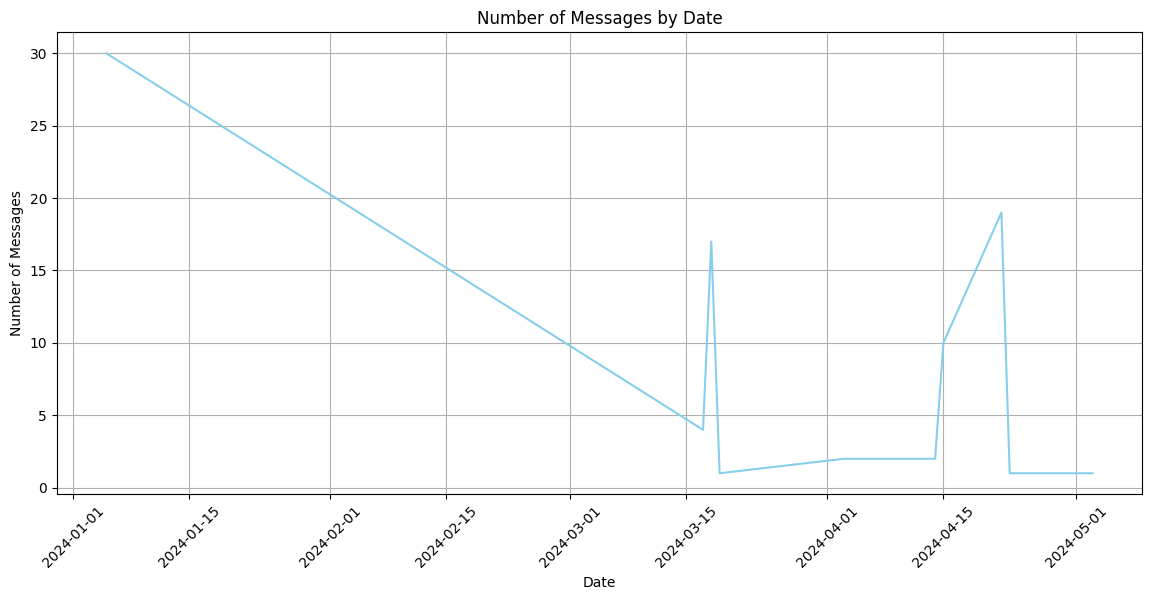

In [17]:
# Top 10 users with the most number of messages
top_10_users = data['Author'].value_counts().head(10)

# Plotting the top 10 users
plt.figure(figsize=(10,6))
top_10_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Users with Maximum Number of Messages')
plt.xlabel('Users')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Grouping data by date
messages_by_date = data.groupby(data['Date'].dt.date).size()

# Finding the days with the most number of messages
most_messages_day = messages_by_date.idxmax()
most_messages_count = messages_by_date.max()
print("\n")
print("\n")
print(f"The day with the maximum number of messages was {most_messages_day} with {most_messages_count} messages.")

# Plotting number of messages by date
plt.figure(figsize=(14, 6))
messages_by_date.plot(kind='line', color='skyblue')
plt.title('Number of Messages by Date')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



<ipython-input-6-e3d6c6d23e65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day_of_week'] = data['Date'].dt.day_name()
<ipython-input-6-e3d6c6d23e65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month_name()


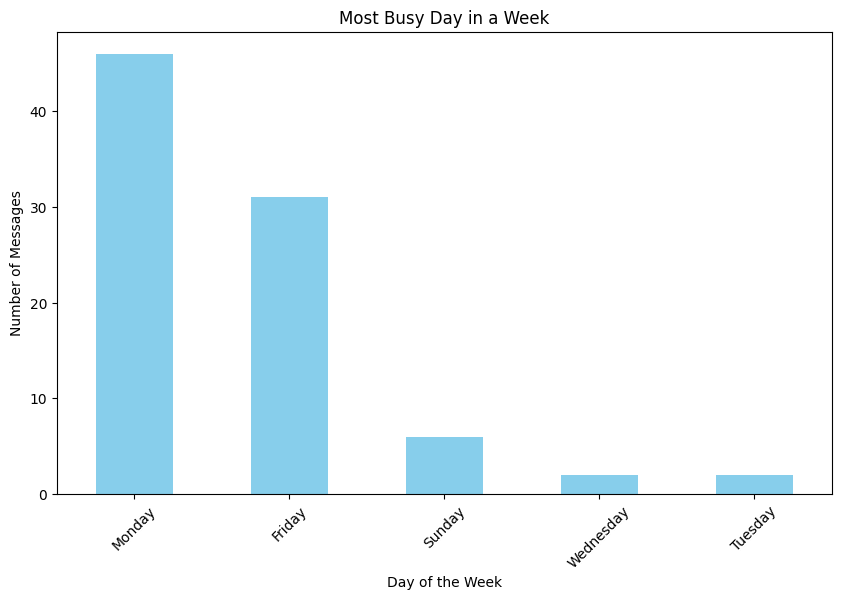

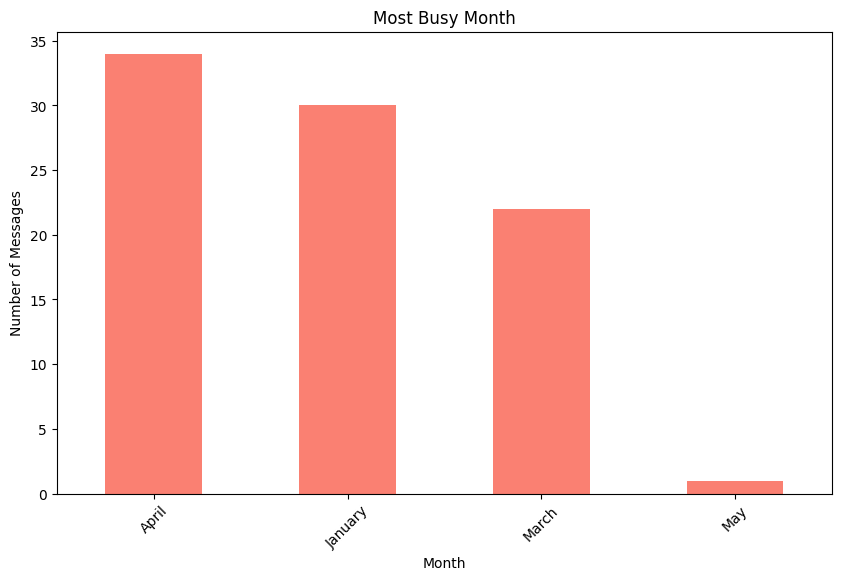

In [ ]:
# Extracting day of the week
data['Day_of_week'] = data['Date'].dt.day_name()

# Extracting month
data['Month'] = data['Date'].dt.month_name()

# Plotting most busy day in a week
plt.figure(figsize=(10, 6))
data['Day_of_week'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Busy Day in a Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.show()

# Plotting most busy month
plt.figure(figsize=(10, 6))
data['Month'].value_counts().plot(kind='bar', color='salmon')
plt.title('Most Busy Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.show()
